In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 66

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 8

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,130
Trainable params: 1,130
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/1 [==============================] - ETA: 0s - loss: 2.0606 - accuracy: 0.1222
Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 418ms/step - loss: 2.0606 - accuracy: 0.1222 - val_loss: 2.0858 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - ETA: 0s - loss: 2.0572 - accuracy: 0.1333
Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 35ms/step - loss: 2.0572 - accuracy: 0.1333 - val_loss: 2.0816 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - ETA: 0s - loss: 2.0525 - accuracy: 0.1222
Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 35ms/step - loss: 2.0525 - accuracy: 0.1222 - val_loss: 2.0772 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] -

1/1 [==============================] - ETA: 0s - loss: 1.9141 - accuracy: 0.3444
Epoch 00027: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 31ms/step - loss: 1.9141 - accuracy: 0.3444 - val_loss: 1.9598 - val_accuracy: 0.5484
Epoch 28/1000
1/1 [==============================] - ETA: 0s - loss: 1.8895 - accuracy: 0.4000
Epoch 00028: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 32ms/step - loss: 1.8895 - accuracy: 0.4000 - val_loss: 1.9545 - val_accuracy: 0.5161
Epoch 29/1000
1/1 [==============================] - ETA: 0s - loss: 1.8816 - accuracy: 0.4444
Epoch 00029: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 31ms/step - loss: 1.8816 - accuracy: 0.4444 - val_loss: 1.9492 - val_accuracy: 0.5161
Epoch 30/1000
1/1 [==============================] - ETA: 0s - loss: 1.8777

1/1 [==============================] - ETA: 0s - loss: 1.7147 - accuracy: 0.4778
Epoch 00053: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 32ms/step - loss: 1.7147 - accuracy: 0.4778 - val_loss: 1.8100 - val_accuracy: 0.5806
Epoch 54/1000
1/1 [==============================] - ETA: 0s - loss: 1.6920 - accuracy: 0.5222
Epoch 00054: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 27ms/step - loss: 1.6920 - accuracy: 0.5222 - val_loss: 1.8036 - val_accuracy: 0.5806
Epoch 55/1000
1/1 [==============================] - ETA: 0s - loss: 1.6606 - accuracy: 0.5000
Epoch 00055: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 34ms/step - loss: 1.6606 - accuracy: 0.5000 - val_loss: 1.7972 - val_accuracy: 0.5806
Epoch 56/1000
1/1 [==============================] - ETA: 0s - loss: 1.6764

1/1 [==============================] - ETA: 0s - loss: 1.4491 - accuracy: 0.6333
Epoch 00079: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 32ms/step - loss: 1.4491 - accuracy: 0.6333 - val_loss: 1.6397 - val_accuracy: 0.6129
Epoch 80/1000
1/1 [==============================] - ETA: 0s - loss: 1.4470 - accuracy: 0.7000
Epoch 00080: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 31ms/step - loss: 1.4470 - accuracy: 0.7000 - val_loss: 1.6331 - val_accuracy: 0.6129
Epoch 81/1000
1/1 [==============================] - ETA: 0s - loss: 1.4478 - accuracy: 0.6778
Epoch 00081: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 39ms/step - loss: 1.4478 - accuracy: 0.6778 - val_loss: 1.6264 - val_accuracy: 0.6129
Epoch 82/1000
1/1 [==============================] - ETA: 0s - loss: 1.4581

1/1 [==============================] - ETA: 0s - loss: 1.1930 - accuracy: 0.7667
Epoch 00105: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 33ms/step - loss: 1.1930 - accuracy: 0.7667 - val_loss: 1.4652 - val_accuracy: 0.7097
Epoch 106/1000
1/1 [==============================] - ETA: 0s - loss: 1.1472 - accuracy: 0.8111
Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 36ms/step - loss: 1.1472 - accuracy: 0.8111 - val_loss: 1.4592 - val_accuracy: 0.7097
Epoch 107/1000
1/1 [==============================] - ETA: 0s - loss: 1.1908 - accuracy: 0.8111
Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 40ms/step - loss: 1.1908 - accuracy: 0.8111 - val_loss: 1.4533 - val_accuracy: 0.7097
Epoch 108/1000
1/1 [==============================] - ETA: 0s - loss: 1.1

1/1 [==============================] - ETA: 0s - loss: 1.0152 - accuracy: 0.7444
Epoch 00131: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 33ms/step - loss: 1.0152 - accuracy: 0.7444 - val_loss: 1.3372 - val_accuracy: 0.6452
Epoch 132/1000
1/1 [==============================] - ETA: 0s - loss: 1.0306 - accuracy: 0.7333
Epoch 00132: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 34ms/step - loss: 1.0306 - accuracy: 0.7333 - val_loss: 1.3337 - val_accuracy: 0.6452
Epoch 133/1000
1/1 [==============================] - ETA: 0s - loss: 1.0044 - accuracy: 0.7333
Epoch 00133: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 33ms/step - loss: 1.0044 - accuracy: 0.7333 - val_loss: 1.3303 - val_accuracy: 0.6452
Epoch 134/1000
1/1 [==============================] - ETA: 0s - loss: 1.0

1/1 [==============================] - ETA: 0s - loss: 0.8508 - accuracy: 0.8000
Epoch 00157: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 34ms/step - loss: 0.8508 - accuracy: 0.8000 - val_loss: 1.2807 - val_accuracy: 0.7097
Epoch 158/1000
1/1 [==============================] - ETA: 0s - loss: 0.8469 - accuracy: 0.7778
Epoch 00158: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 32ms/step - loss: 0.8469 - accuracy: 0.7778 - val_loss: 1.2799 - val_accuracy: 0.7097
Epoch 159/1000
1/1 [==============================] - ETA: 0s - loss: 0.9356 - accuracy: 0.7667
Epoch 00159: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 34ms/step - loss: 0.9356 - accuracy: 0.7667 - val_loss: 1.2790 - val_accuracy: 0.6774
Epoch 160/1000
1/1 [==============================] - ETA: 0s - loss: 0.8

1/1 [==============================] - ETA: 0s - loss: 0.7524 - accuracy: 0.7889
Epoch 00183: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 36ms/step - loss: 0.7524 - accuracy: 0.7889 - val_loss: 1.2722 - val_accuracy: 0.6774
Epoch 184/1000
1/1 [==============================] - ETA: 0s - loss: 0.8226 - accuracy: 0.8000
Epoch 00184: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 35ms/step - loss: 0.8226 - accuracy: 0.8000 - val_loss: 1.2722 - val_accuracy: 0.6774
Epoch 185/1000
1/1 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.8222
Epoch 00185: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 44ms/step - loss: 0.7114 - accuracy: 0.8222 - val_loss: 1.2721 - val_accuracy: 0.6774
Epoch 186/1000
1/1 [==============================] - ETA: 0s - loss: 0.7

1/1 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.8111
Epoch 00209: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 33ms/step - loss: 0.6633 - accuracy: 0.8111 - val_loss: 1.2793 - val_accuracy: 0.6774
Epoch 210/1000
1/1 [==============================] - ETA: 0s - loss: 0.7690 - accuracy: 0.7889
Epoch 00210: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 34ms/step - loss: 0.7690 - accuracy: 0.7889 - val_loss: 1.2805 - val_accuracy: 0.6774
Epoch 211/1000
1/1 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.7889
Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
1/1 [==============================] - 0s 35ms/step - loss: 0.6783 - accuracy: 0.7889 - val_loss: 1.2820 - val_accuracy: 0.6774
Epoch 212/1000
1/1 [==============================] - ETA: 0s - loss: 0.6

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.0027123  0.01255445 0.00953985 0.00998341 0.18182433 0.11635768
 0.6523484  0.01467955]
6


# 混同行列

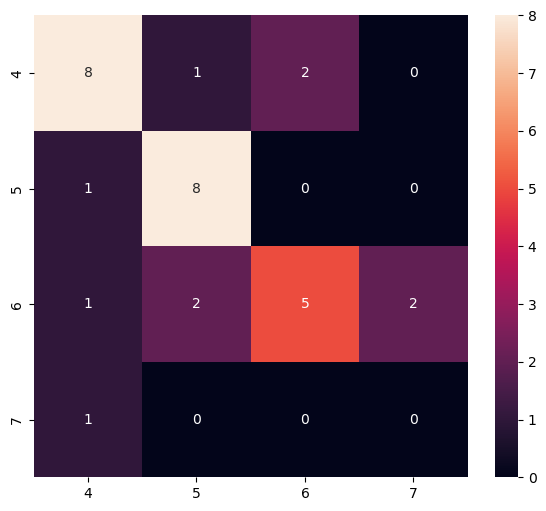

Classification Report
              precision    recall  f1-score   support

           4       0.73      0.73      0.73        11
           5       0.73      0.89      0.80         9
           6       0.71      0.50      0.59        10
           7       0.00      0.00      0.00         1

    accuracy                           0.68        31
   macro avg       0.54      0.53      0.53        31
weighted avg       0.70      0.68      0.68        31



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

6296

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.0027123  0.01255445 0.00953984 0.00998341 0.18182433 0.1163577
 0.65234834 0.01467955]
6
